C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 339ms/step - accuracy: 0.8085 - loss: 0.4125 - val_accuracy: 0.7500 - val_loss: 0.5059
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 375ms/step - accuracy: 0.9476 - loss: 0.1378 - val_accuracy: 0.7500 - val_loss: 0.4560
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 441ms/step - accuracy: 0.9651 - loss: 0.1020 - val_accuracy: 0.8750 - val_loss: 0.3119
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 468ms/step - accuracy: 0.9688 - loss: 0.0953 - val_accuracy: 0.9375 - val_loss: 0.2801
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 522ms/step - accuracy: 0.9720 - loss: 0.0810 - val_accuracy: 0.7500 - val_loss: 0.5399
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 461ms/step - accuracy: 0.9760 - loss: 0.0633 - val_accuracy: 0.8750 - val_loss: 0.2562
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 408ms/step - accuracy: 0.9826 - loss: 0.0533 - val_accuracy: 0.9375 - val_loss: 0.2572
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 408ms/step - accuracy: 0.9803 - loss: 0

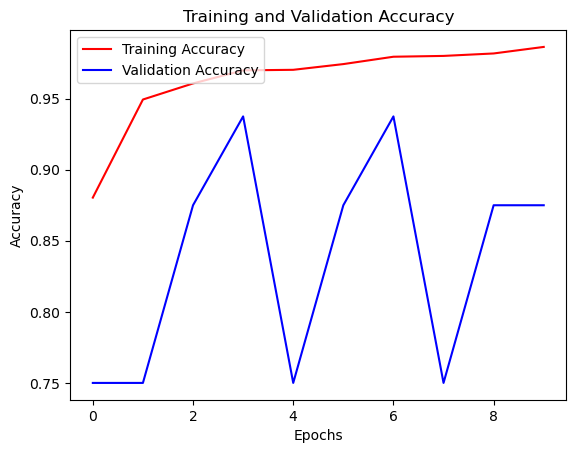

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
              precision    recall  f1-score   support

   PNEUMONIA       0.73      0.99      0.84       390
      NORMAL       0.98      0.38      0.55       234

    accuracy                           0.76       624
   macro avg       0.85      0.69      0.69       624
weighted avg       0.82      0.76      0.73       624



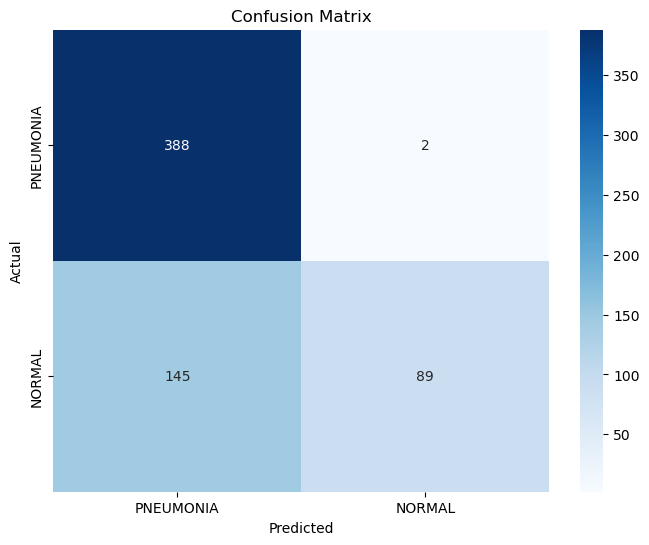

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define labels and image size
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128

# Function to load data
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    continue
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

# Load training, validation, and test data
train = get_data("chest_xray/chest_xray/train")
test = get_data("chest_xray/chest_xray/test")
val = get_data("chest_xray/chest_xray/val")

# Preprocessing Data
x_train, y_train = zip(*train)
x_test, y_test = zip(*test)
x_val, y_val = zip(*val)

x_train = np.array(x_train).reshape(-1, 128, 128, 1) / 255.0
x_test = np.array(x_test).reshape(-1,  128, 128, 1) / 255.0
x_val = np.array(x_val).reshape(-1,  128, 128, 1) / 255.0

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

# Building the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the Model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluating the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Visualizing Training and Validation Accuracy
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes, target_names=labels))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
def preprocess_image(image_path):
    img_size = 128  # Same as training size
    img_arr = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_arr = cv2.resize(img_arr, (img_size, img_size)) / 255.0  # Normalize
    return resized_arr.reshape(1, img_size, img_size, 1)  # Reshape for model

In [16]:
# Function to Predict on New Image with Confidence Percentage
def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (img_size, img_size))
    img_array = img_resized.reshape(1, img_size, img_size, 1) / 255.0  # Normalize
    probability = model.predict(img_array)[0][0]  # Get probability

    # Convert probability to percentage
    confidence = probability * 100 if probability >= 0.5 else (1 - probability) * 100
    label = "NORMAL" if probability >= 0.5 else "PNEUMONIA"
    
    # Display Image with Prediction
    plt.imshow(img, cmap="gray")
    plt.title(f"Prediction: {label} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

    return label, confidence





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


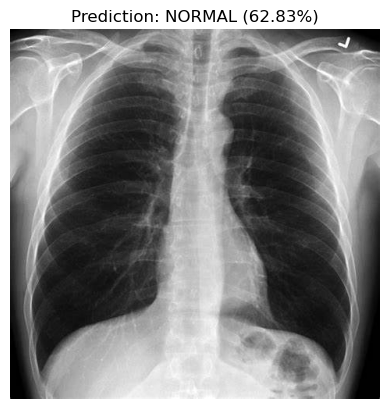

Model Prediction: NORMAL with 62.83% confidence


In [42]:
image_path = r"Downloads\OIP.jpg"  
prediction, confidence = predict_image(image_path)
print(f"Model Prediction: {prediction} with {confidence:.2f}% confidence")